In [1]:
using Plots
using JuMP
import Ipopt

In [68]:
N = 100
dt = 0.01
model = Model(Ipopt.Optimizer)
R = 1.0
Q = 100000.0
@variables(model, begin
    x[1:N]
    v[1:N]
    u[1:N]
end)
fix(x[1], 0.0)
# fix(x[N], 1.0)
fix(v[1], 0.0)
fix(v[N], 0.0)
@NLobjective(model, Min, R * sum(u[i]^2 for i in 1:N) + Q * (x[N] - 1)^2 + Q * (x[Int(N/2)]-0.75)^2)
@constraint(model, [i in 1:N-1], v[i+1] - v[i] == 0.5 * dt*(u[i+1] + u[i]))
@constraint(model, [i in 1:N-1], x[i+1] - x[i] == 0.5 * dt*(v[i+1] + v[i]))
optimize!(model)

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:      787
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      102

Total number of variables............................:      297
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      198
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.5625000e+05 0.00e+00 6.84e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [126]:
function f(s, u)
    x = s[1]
    v = s[2]
    return [v; u]
end
    
N = 100
dt = 0.01
# x_0 = LinRange(0.0, 1.0, N)
# x_0 = zeros(N,2)
s_0 = [LinRange(0.0, 1.0, N) zeros(N)]
model = Model(Ipopt.Optimizer)
R = 1.0
Q = 100000.0
@variables(model, begin
    s[i=1:N, j=1:2], (start = s_0[i,j])
    u[1:N]
end)
fix(s[1,1], 0.0)
fix(s[N,1], 1.0)
fix(s[1,2], 0.0)
fix(s[N,2], 0.0)
@NLobjective(model, Min, R * sum(u[i]^2 for i in 1:N))
@constraint(model, [i in 1:N-1], s[i+1,:] - s[i,:] == 0.5 * dt * (f(s[i,:], u[i]) + f(s[i+1,:], u[i+1])))
optimize!(model)

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:      786
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      100

Total number of variables............................:      296
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      198
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.01e-02 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [90]:
x_0 = LinRange(0.0, 1.0, N)

x_0[1]

0.0

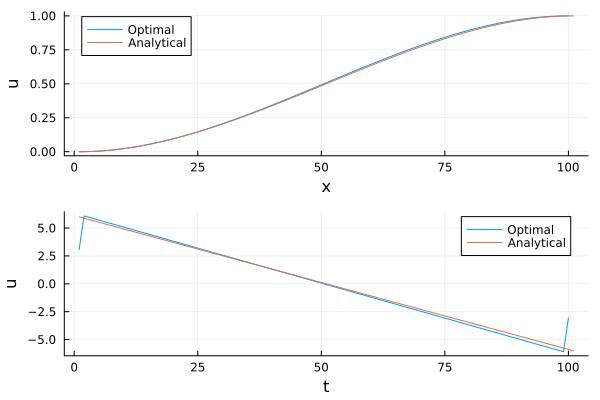

In [99]:
t = 0.0:dt:1.0
u_optimal = 6 .- 12 *t
x_optimal = 3 * t .^ 2 .- 2 * t.^3
# p_1 = plot(value.(x))
# p_2 = plot(value.(u))
# p_2 = plot!(u_optimal)
# plot(p_1, p_2, layout = (2,1))
# plot optimal x and u in a separate grid with the optimization result
p_1 = plot(value.(s[1:N,1]), label = "Optimal", xlabel = "x", ylabel = "u")
plot!(p_1, x_optimal, label = "Analytical")

p_2 = plot(value.(u), label = "Optimal", xlabel = "t", ylabel = "u")
plot!(p_2, u_optimal, label = "Analytical")

plot(p_1, p_2, layout = (2,1))

In [7]:
optimize!(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [8]:
objective_value(model)

1.3288608467480825e-28

In [2]:
function generate_target_and_constraints(box_width)
    N_points = 1000
    t = LinRange(0,1.0,N_points)
    target_x = cos.(2 * pi * t)
    target_y = sin.(2 * pi * t)

    constraint_x = [-box_width * ones(n_points);LinRange(-box_width, box_width, n_points); box_width * ones(n_points); LinRange(-box_width, box_width, n_points)]
    constraint_y = [LinRange(-box_width, box_width, n_points); box_width * ones(n_points); LinRange(-box_width, box_width, n_points);-box_width * ones(n_points)]

    return target_x, target_y, constraint_x, constraint_y
end


get_target (generic function with 1 method)

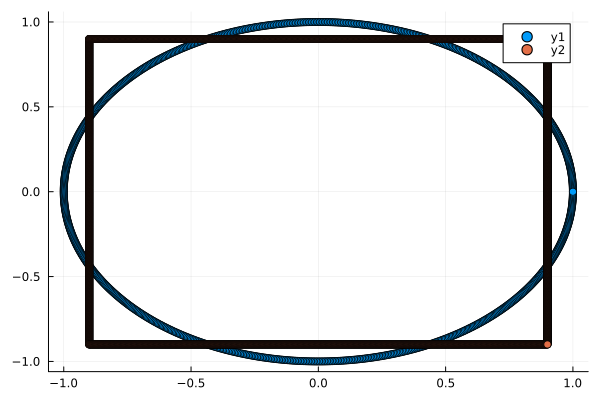

In [3]:
target_x, target_y, constraint_x, constraint_y = get_target()
scatter(target_x, target_y)
scatter!(constraint_x, constraint_y)
# scatter!(points[1,:], points[2,:])

In [56]:
const g = 9.81
const m = 1
const l = 0.3
const J = 0.2 *m*l*l

# function f(s, u)
#     # ddx = (u[1]+u[2])/m * sin(s[3])
#     # ddz = (u[1]+u[2])/m * cos(s[3]) - g
#     # ddtheta = (u[2]-u[1])*l / (sqrt(2) * J)
#     return [s[4:6]; 0.0; 0.0; 0.0]
#     # return [s[4:6]; ddx; ddz; ddtheta]
# end

N_state = 6
N_iter = 100
dt = 1 / N_iter
# x_0 = LinRange(0.0, 1.0, N)
s_initial = zeros(N_state)
s_0 = zeros(N_iter,6)
s_0[:,1] = LinRange(0.0, 0.5, N_iter)
s_0[:,2] = LinRange(0.0, 1.0, N_iter)
s_end = [0.5;1.0;0.0;0.0;0.0;0.0]
model = Model(Ipopt.Optimizer)
R = 1.0
Q = 1.0
@variables(model, begin
s[i=1:N_iter, j=1:6], (start = s_0[i,j])
0.2 * g/m <= u[1:N_iter, 1:2] <= 0.8 * g/m, (start = 1.0)
end)
@NLexpression(model, ddx[j=1:N_iter], (u[j,1]+u[j,2])/m * sin(s[j,3]))
@NLexpression(model, ddz[j=1:N_iter], (u[j,1]+u[j,2])/m * cos(s[j,3]) - g)
@NLexpression(model, ddtheta[j=1:N_iter], (u[j,2]-u[j,1])*l / (sqrt(2) * J))
for i in 1:N_state
    fix(s[1,i], s_initial[i], force = true)
    fix(s[N_iter,i], s_end[i], force = true)
end
for i in 1:2
    fix(u[N_iter,i], 0.5 * g/m, force = true)
end
@NLobjective(model, Min, sum(u[i]^2 for i in 1:N_iter))
# @NLconstraint(model, [i in 1:N-1], s[i+1,:] - s[i,:] == 0.5 * dt * (f(s[i,:], u[i]) + f(s[i+1,:], u[i+1])))
@constraint(model, [i in 1:N_iter-1], s[i+1,1] - s[i,1] == 0.5 * dt * (s[i,4] + s[i+1,4]))
@constraint(model, [i in 1:N_iter-1], s[i+1,2] - s[i,2] == 0.5 * dt * (s[i,5] + s[i+1,5]))
@constraint(model, [i in 1:N_iter-1], s[i+1,3] - s[i,3] == 0.5 * dt * (s[i,6] + s[i+1,6]))
@NLconstraint(model, [i in 1:N_iter-1], s[i+1,4] - s[i,4] == 0.5 * dt * (ddx[i] + ddx[i+1]))
@NLconstraint(model, [i in 1:N_iter-1], s[i+1,5] - s[i,5] == 0.5 * dt * (ddz[i] + ddz[i+1]))
@NLconstraint(model, [i in 1:N_iter-1], s[i+1,6] - s[i,6] == 0.5 * dt * (ddtheta[i] + ddtheta[i+1]))
optimize!(model)

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:     3338
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2457

Total number of variables............................:      786
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      198
                     variables with only upper bounds:        0
Total number of equality constraints.................:      594
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.1281398e+02 5.85e-02 1.91e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [38]:
# TODO:
# 1. Handle parameters in a better way
# 2. Extract code in to a separate file
# 3. Replace magic numbers

const model_constants = (g = 9.81, m = 1, l = 0.3, J = 0.2 * 1 * 0.3 * 0.3)
const constraint_constants = (box_width = 0.9, u_min = 0.2 * model_constants.g / model_constants.m, u_max = 0.8 * model_constants.g / model_constants.m)
const mpc_solver_constants = (N_state = 6, T_final = 1.0, N_iter = 100, Q = 10000.0, R = 1.0)
const simulation_constants = (T_final = 1.0, dt = 0.01)

function calculate_state_derivatives(s, u)
    g, m, l, J = model_constants
    ddx = (u[1]+u[2])/m * sin(s[3])
    ddz = (u[1]+u[2])/m * cos(s[3]) - g
    ddtheta = (u[2]-u[1])*l / (sqrt(2) * J)
    return [s[4], s[5], s[6], ddx, ddz, ddtheta]
end
function integrate_runge_kutta_4(f, s, u, dt)
    k1 = f(s, u)
    k2 = f(s + dt/2 * k1, u)
    k3 = f(s + dt/2 * k2, u)
    k4 = f(s + dt * k3, u)
    return s + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
end

function generate_target_trajectory(t, n, dt)
    s_d = zeros(n, 2)
    for i in 1:n
        s_d[i,1] = cos(pi/2*(t + i*dt))
        s_d[i,2] = sin(pi/2*(t + i*dt))
    end
    return s_d
end
function model_predictive_control(t, s_current, s_old, u_old)
    g, m, l, J = model_constants

    box_width, u_min, u_max = constraint_constants

    N_state, T_final, N_iter, Q, R = mpc_solver_constants

    dt = T_final / N_iter

    s_d = generate_target_trajectory(t, N_iter, dt)

    s_0 = [s_current; s_old[3:end,:]; s_old[end:end,:]]
    s_0[end,1:2] = s_d[end,1:2]

    u_0 = [u_old; u_old[end:end,:]]
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variables(model, begin
    s[i=1:N_iter, j=1:6], (start = s_0[i,j])
    u_min <= u[i=1:N_iter, j=1:2] <= u_max, (start = u_0[i,j])
    end)
    @NLexpression(model, ddx[j=1:N_iter], (u[j,1]+u[j,2])/m * sin(s[j,3]))
    @NLexpression(model, ddz[j=1:N_iter], (u[j,1]+u[j,2])/m * cos(s[j,3]) - g)
    @NLexpression(model, ddtheta[j=1:N_iter], (u[j,2]-u[j,1])*l / (sqrt(2) * J))
    
    # State constraints
    @constraint(model, [i in 1:N_iter], -box_width <= s[i,1] <= box_width)
    @constraint(model, [i in 1:N_iter], -box_width <= s[i,2] <= box_width)

    # Dynamics constraints
    @constraint(model, [i in 1:N_iter-1], s[i+1,1] - s[i,1] == 0.5 * dt * (s[i,4] + s[i+1,4]))
    @constraint(model, [i in 1:N_iter-1], s[i+1,2] - s[i,2] == 0.5 * dt * (s[i,5] + s[i+1,5]))
    @constraint(model, [i in 1:N_iter-1], s[i+1,3] - s[i,3] == 0.5 * dt * (s[i,6] + s[i+1,6]))
    @NLconstraint(model, [i in 1:N_iter-1], s[i+1,4] - s[i,4] == 0.5 * dt * (ddx[i] + ddx[i+1]))
    @NLconstraint(model, [i in 1:N_iter-1], s[i+1,5] - s[i,5] == 0.5 * dt * (ddz[i] + ddz[i+1]))
    @NLconstraint(model, [i in 1:N_iter-1], s[i+1,6] - s[i,6] == 0.5 * dt * (ddtheta[i] + ddtheta[i+1]))
    
    for i in 1:N_state
        fix(s[1,i], s_0[1,i], force = true)
    end
    
    @NLobjective(model, Min, sum(R * (u[i,1]^2 + u[i,2]^2) + Q * ((s[i,1] - s_d[i,1])^2 + (s[i,2] - s_d[i,2])^2) for i in 1:N_iter))
    optimize!(model)
    return value.(s), value.(u)
end

# control closed_loop
s_current = [constraint_constants.box_width-0.1, 0.0, 0.0, 0.0, 0.0, 0.0]'
t = 0.0
s_d = generate_target_trajectory(t, mpc_solver_constants.N_iter, simulation_constants.dt)
s_old = zeros(100, 6)
s_old[:,1] = LinRange(s_current[1], s_d[end,1], 100)
s_old[:,2] = LinRange(s_current[2], s_d[end,2], 100)
u_old = zeros(100, 2)

s_history = Vector{Vector{Float64}}()
u_history = Vector{Vector{Float64}}()
push!(s_history, s_current[1,:])
push!(u_history, u_old[1,:])
N_simulation = Int(simulation_constants.T_final / simulation_constants.dt)
for i in 1:1000
    s, u = model_predictive_control(t, s_current, s_old, u_old)
    t += simulation_constants.dt
    s_current = integrate_runge_kutta_4(calculate_state_derivatives, s_current[1,:], u[1,:], simulation_constants.dt)'
    push!(s_history, s_current[1,:])
    push!(u_history, u[1,:])
    s_old = s
    u_old = u
end
s_history = hcat(s_history...)'
u_history = hcat(u_history...)'


1001×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0    0.0
 7.848  7.848
 7.848  7.848
 7.848  7.848
 7.848  7.848
 7.848  7.848
 7.848  7.848
 7.848  7.848
 7.848  7.848
 7.848  7.68175
 ⋮      
 1.962  5.97603
 1.962  5.74842
 1.962  5.56293
 1.962  5.06166
 1.962  4.58791
 1.962  4.40145
 1.962  4.0118
 1.962  4.01321
 1.962  3.99604

In [36]:
const model_constants = (g = 9.81, m = 1, l = 0.3, J = 0.2 * 1 * 0.3 * 0.3)
const constraint_constants = (box_width = 0.9, u_min = 0.2 * model_constants.g / model_constants.m, u_max = 0.8 * model_constants.g / model_constants.m)

function f(s, u)
    # Model constants
    g = 9.81
    m = 1
    l = 0.3
    J = 0.2 *m*l*l

    ddx = (u[1]+u[2])/m * sin(s[3])
    ddz = (u[1]+u[2])/m * cos(s[3]) - g
    ddtheta = (u[2]-u[1])*l / (sqrt(2) * J)
    return [s[4], s[5], s[6], ddx, ddz, ddtheta]
end
function runge_kutta_4(f, s, u, dt)
    k1 = f(s, u)
    k2 = f(s + dt/2 * k1, u)
    k3 = f(s + dt/2 * k2, u)
    k4 = f(s + dt * k3, u)
    return s + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
end

function target_trajectory(t, n, dt)
    s_d = zeros(n, 2)
    for i in 1:n
        s_d[i,1] = cos(pi/2*(t + i*dt))
        s_d[i,2] = sin(pi/2*(t + i*dt))
    end
    return s_d
end
function model_predictive_control(t, s_current, s_old, u_old)
    # Model constants
    g, m, l, J = model_constants
    # Constraint constants
    box_width = 0.9

    # Solver contants
    N_state = 6
    T_final = 1.0
    N_iter = 100
    Q = 10000.0
    R = 1.0

    dt = T_final / N_iter

    s_d = target_trajectory(t, N_iter, dt)

    s_0 = [s_current; s_old[3:end,:]; s_old[end:end,:]]
    s_0[end,1:2] = s_d[end,1:2]

    u_0 = [u_old; u_old[end:end,:]]
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variables(model, begin
    s[i=1:N_iter, j=1:6], (start = s_0[i,j])
    u_min <= u[i=1:N_iter, j=1:2] <= u_max, (start = u_0[i,j])
    end)
    @NLexpression(model, ddx[j=1:N_iter], (u[j,1]+u[j,2])/m * sin(s[j,3]))
    @NLexpression(model, ddz[j=1:N_iter], (u[j,1]+u[j,2])/m * cos(s[j,3]) - g)
    @NLexpression(model, ddtheta[j=1:N_iter], (u[j,2]-u[j,1])*l / (sqrt(2) * J))
    
    # State constraints
    @constraint(model, [i in 1:N_iter], -box_width <= s[i,1] <= box_width)
    @constraint(model, [i in 1:N_iter], -box_width <= s[i,2] <= box_width)

    # Dynamics constraints
    @constraint(model, [i in 1:N_iter-1], s[i+1,1] - s[i,1] == 0.5 * dt * (s[i,4] + s[i+1,4]))
    @constraint(model, [i in 1:N_iter-1], s[i+1,2] - s[i,2] == 0.5 * dt * (s[i,5] + s[i+1,5]))
    @constraint(model, [i in 1:N_iter-1], s[i+1,3] - s[i,3] == 0.5 * dt * (s[i,6] + s[i+1,6]))
    @NLconstraint(model, [i in 1:N_iter-1], s[i+1,4] - s[i,4] == 0.5 * dt * (ddx[i] + ddx[i+1]))
    @NLconstraint(model, [i in 1:N_iter-1], s[i+1,5] - s[i,5] == 0.5 * dt * (ddz[i] + ddz[i+1]))
    @NLconstraint(model, [i in 1:N_iter-1], s[i+1,6] - s[i,6] == 0.5 * dt * (ddtheta[i] + ddtheta[i+1]))
    
    for i in 1:N_state
        fix(s[1,i], s_0[1,i], force = true)
    end
    
    @NLobjective(model, Min, sum(R * (u[i,1]^2 + u[i,2]^2) + Q * ((s[i,1] - s_d[i,1])^2 + (s[i,2] - s_d[i,2])^2) for i in 1:N_iter))
    optimize!(model)
    return value.(s), value.(u)
end

# control closed_loop
s_current = [0.85, 0.0, 0.0, 0.0, 0.0, 0.0]'
# TODO: fix dependency on N_iter and dt
s_d = target_trajectory(0.0, 100, 0.01)
s_old = zeros(100, 6)
s_old[:,1] = LinRange(s_current[1], s_d[end,1], 100)
s_old[:,2] = LinRange(s_current[2], s_d[end,2], 100)
u_old = zeros(100, 2)
t = 0.0
s_history = Vector{Vector{Float64}}()
push!(s_history, s_current[1,:])
u_history = Vector{Vector{Float64}}()
push!(u_history, u_old[1,:])
for i in 1:100
    s, u = model_predictive_control(t, s_current, s_old, u_old)
    t += 0.01
    # s_current = s[2:2,:]
    s_current = runge_kutta_4(f, s_current[1,:], u[1,:], 0.01)'
    push!(s_history, s_current[1,:])
    push!(u_history, u[1,:])
    s_old = s
    u_old = u
    # println(s_current)
end
s_history = hcat(s_history...)'
u_history = hcat(u_history...)'

101×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0        0.0
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 ⋮          
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494
 0.0815494  0.0815494

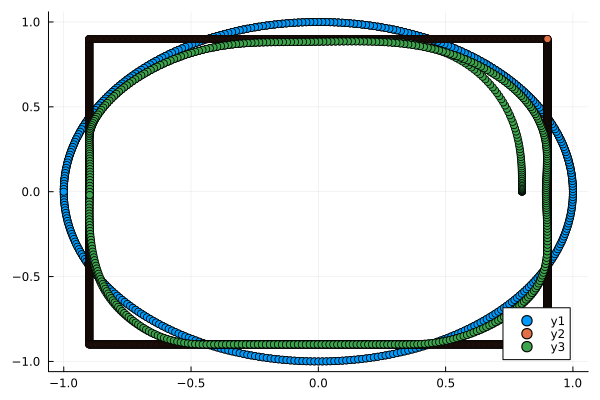

In [39]:
# target_x, target_y, constraint_x, constraint_y = get_target()
# scatter(target_x, target_y)
# scatter(s_0[:,1], s_0[:,2])
s_target = target_trajectory(0.0, 1000, 0.01)
scatter(s_target[:,1], s_target[:,2])
scatter!(constraint_x, constraint_y)
scatter!(s_history[:,1], s_history[:,2])

In [44]:
plot(u_history)

1001×6 adjoint(::Matrix{Float64}) with eltype Float64:
  0.8        0.0          0.0           0.0           0.0        0.0
  0.8        0.0002943   -1.12348e-12  -5.87805e-14   0.05886   -2.24696e-10
  0.8        0.0011772   -4.29001e-12  -4.59576e-13   0.11772   -4.08611e-10
  0.8        0.0026487   -9.56879e-12  -1.51601e-12   0.17658   -6.47144e-10
  0.8        0.0047088   -1.76362e-11  -3.60931e-12   0.23544   -9.66344e-10
  0.8        0.0073575   -3.34665e-11  -7.45853e-12   0.2943    -2.19971e-9
  0.8        0.0105948   -6.47927e-11  -1.49259e-11   0.35316   -4.06554e-9
  0.8        0.0144207   -1.1139e-10   -2.85972e-11   0.41202   -5.25386e-9
  0.8        0.0188352   -2.08219e-10  -5.25215e-11   0.47088   -1.4112e-8
  0.8        0.02383     -9.79623e-5   -5.07118e-6    0.528078  -0.0195924
  ⋮                                                              ⋮
 -0.896773   0.117682    -0.103387      0.00454628   -1.59996   -0.356475
 -0.896768   0.101575    -0.104721     -0.0034907

In [47]:
S = [SVector{6}(x) for x in eachrow(s_history)];


In [48]:
S

1001-element Vector{SVector{6, Float64}}:
 [0.8, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.7999999999999999, 0.00029430000773662525, -1.1234801821753282e-12, -5.878048371087618e-14, 0.05886000154732505, -2.2469603643506562e-10]
 [0.7999999999999977, 0.001177200030969198, -4.290014914548662e-12, -4.595755173969645e-13, 0.11772000309918952, -4.086109100396012e-10]
 [0.7999999999999885, 0.0026487000696969066, -9.568790844676056e-12, -1.516014439528519e-12, 0.17658000464635215, -6.471442759858775e-10]
 [0.799999999999964, 0.004708800123861639, -1.7636234158879347e-11, -3.609313447847351e-12, 0.23544000618659414, -9.663443868547809e-10]
 [0.7999999999999107, 0.007357500193019811, -3.3466489878359645e-11, -7.458531468035767e-12, 0.2943000076450404, -2.199706757041279e-9]
 [0.7999999999998029, 0.01059480027649281, -6.479270403475128e-11, -1.4925862598467118e-11, 0.35316000904955913, -4.065536074237049e-9]
 [0.7999999999995914, 0.014420700374319449, -1.1138968664053168e-10, -2.859722391842473e-11, 0.412020

In [41]:
#Set up visualization
using MeshCat
using RobotZoo: Quadrotor, PlanarQuadrotor
using CoordinateTransformations, Rotations, Colors, StaticArrays, RobotDynamics

function set_mesh!(vis, model::L;
        scaling=1.0, color=colorant"black"
    ) where {L <: Union{Quadrotor, PlanarQuadrotor}} 
    # urdf_folder = joinpath(@__DIR__, "..", "data", "meshes")
    urdf_folder = @__DIR__
    # if scaling != 1.0
    #     quad_scaling = 0.085 * scaling
    obj = joinpath(urdf_folder, "quadrotor_scaled.obj")
    if scaling != 1.0
        error("Scaling not implemented after switching to MeshCat 0.12")
    end
    robot_obj = MeshFileGeometry(obj)
    mat = MeshPhongMaterial(color=color)
    setobject!(vis["robot"]["geom"], robot_obj, mat)
    if hasfield(L, :ned)
        model.ned && settransform!(vis["robot"]["geom"], LinearMap(RotX(pi)))
    end
end

function visualize!(vis, model::PlanarQuadrotor, x::StaticVector)
    py,pz = x[1], x[2]
    θ = x[3]
    settransform!(vis["robot"], compose(Translation(0,py,pz), LinearMap(RotX(-θ))))
end

function visualize!(vis, model, tf::Real, X)
    fps = Int(round((length(X)-1)/tf))
    anim = MeshCat.Animation(fps)
    for (k,x) in enumerate(X)
        atframe(anim, k) do
            x = X[k]
            visualize!(vis, model, SVector{6}(x)) 
        end
    end
    setanimation!(vis, anim)
end

visualize! (generic function with 2 methods)

In [43]:
vis = Visualizer()
model = PlanarQuadrotor()
set_mesh!(vis, model)
render(vis)

┌ Info: Listening on: 127.0.0.1:8701, thread id: 1
└ @ HTTP.Servers /home/jonathan/.julia/packages/HTTP/nn2yB/src/Servers.jl:366
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8701
└ @ MeshCat /home/jonathan/.julia/packages/MeshCat/I6NTX/src/visualizer.jl:63


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x72, 0x6f, 0x62, 0x6f, 0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))), Set{HTTP.WebSockets.WebSocket}(), ip"127.0.0.1", 8701))

In [52]:
S = [SVector{6}(x) for x in eachrow(s_history)];
visualize!(vis, model, t, S)
